In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np 
import pandas as pd 
import os


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 120
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')


OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/tmp/ipykernel_33/3374542881.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [5]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [6]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [7]:
import numpy as np

# Convert the lists to NumPy arrays
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

# Reshape the NumPy arrays
x_train = x_train.reshape(-1, img_size, img_size, 1)
x_val = x_val.reshape(-1, img_size, img_size, 1)
x_test = x_test.reshape(-1, img_size, img_size, 1)

# Convert the labels to NumPy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


In [8]:
# data augmentation 

datagen = ImageDataGenerator(
        
        rotation_range = 10,  
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True,  
        )  


datagen.fit(x_train)


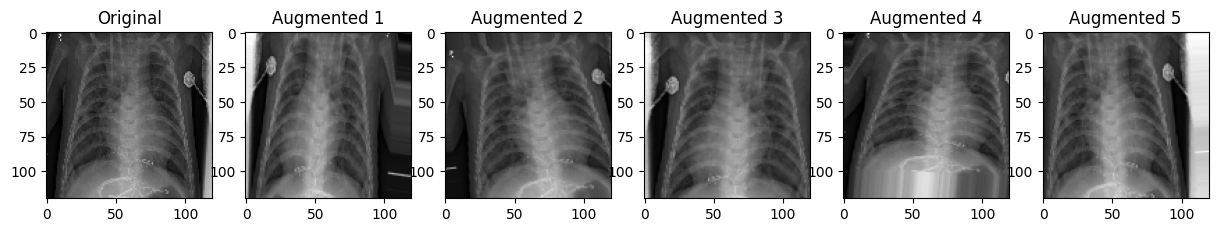

In [9]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Define data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Fit the data augmentation on the training data
datagen.fit(x_train)

# Select an example image from the training data
example_image = x_train[0].reshape(1, img_size, img_size, 1)

# Generate augmented images
augmented_images = [example_image]
for _ in range(5):  # Generate 5 augmented versions of the example image
    augmented_image = datagen.flow(example_image, batch_size=1).next()
    augmented_images.append(augmented_image)

# Plot the original and augmented images
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

# Original image
axes[0].imshow(example_image.reshape(img_size, img_size), cmap='gray')
axes[0].set_title("Original")

# Augmented images
for i, img in enumerate(augmented_images[1:]):
    axes[i + 1].imshow(img.reshape(img_size, img_size), cmap='gray')
    axes[i + 1].set_title(f"Augmented {i + 1}")

plt.show()


In [26]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (120,120,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (120,120,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

#model.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
#model.add(BatchNormalization())
#model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation = 'sigmoid'))
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 120, 120, 32)      320       
                                                                 
 batch_normalization_21 (Bat  (None, 120, 120, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_22 (Bat  (None, 60, 60, 32)       128       
 chNormalization)                                                
                                                     

In [27]:
from tensorflow.keras.optimizers import Adam


In [28]:
model.compile(optimizer='Adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3,verbose=1, factor=0.5, min_lr=0.0001)

In [29]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 111 , validation_data = datagen.flow(x_test, y_test), callbacks = [learning_rate_reduction])

Epoch 1/111
163/163 [==============================] - 109s 650ms/step - loss: 0.4949 - accuracy: 0.8177 - val_loss: 13.7025 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/111
163/163 [==============================] - 106s 651ms/step - loss: 0.3163 - accuracy: 0.8581 - val_loss: 15.4883 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/111
163/163 [==============================] - 106s 651ms/step - loss: 0.2783 - accuracy: 0.8890 - val_loss: 8.6187 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/111
163/163 [==============================] - 107s 656ms/step - loss: 0.2818 - accuracy: 0.8942 - val_loss: 0.7881 - val_accuracy: 0.8045 - lr: 0.0010
Epoch 5/111
163/163 [==============================] - 108s 662ms/step - loss: 0.2611 - accuracy: 0.9095 - val_loss: 11.4932 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/111
163/163 [==============================] - 105s 643ms/step - loss: 0.2140 - accuracy: 0.9214 - val_loss: 0.3717 - val_accuracy: 0.8510 - lr: 0.0010
Epoch 7/111
163/163 [================

In [30]:
#Plot the training artifacts
fig , ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs, train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'yo-' , label = 'Validation Accuracy')
ax[0].set_title('Model Train & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs, val_loss , 'yo-' , label = 'Validation Loss')
ax[1].set_title('Model Train & Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 3s 138ms/step - loss: 0.3895 - accuracy: 0.9247
Loss of the model is -  0.3894994556903839
20/20 [==============================] - 3s 144ms/step - loss: 0.3895 - accuracy: 0.9247
Accuracy of the model is -  92.46794581413269 %


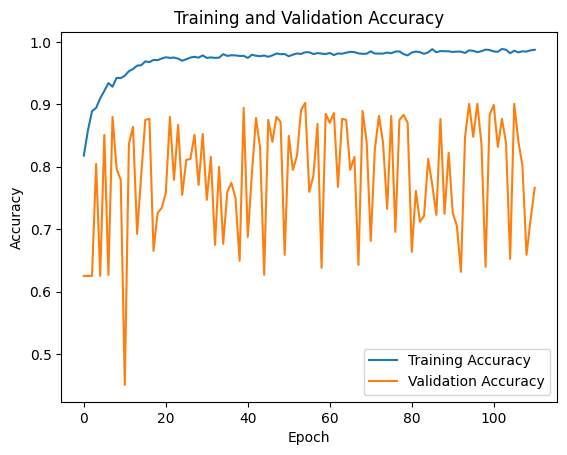

In [31]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


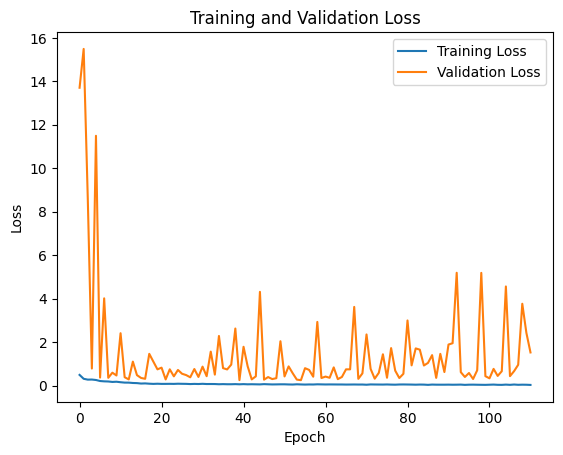

In [32]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:

predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int)
predictions = predictions.reshape(1, -1)[0]



20/20 [==============================] - 3s 146ms/step


In [34]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia','Normal']))

              precision    recall  f1-score   support

   Pneumonia       0.91      0.98      0.94       390
      Normal       0.96      0.84      0.89       234

    accuracy                           0.92       624
   macro avg       0.93      0.91      0.92       624
weighted avg       0.93      0.92      0.92       624



In [35]:
cm = confusion_matrix(y_test,predictions)
cm

array([[381,   9],
       [ 38, 196]])

In [36]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

Text(33.222222222222214, 0.5, 'True Labels')

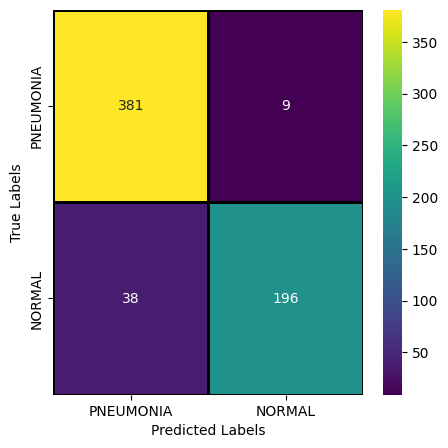

In [37]:
plt.figure(figsize = (5,5))

sns.heatmap(cm,cmap= "viridis", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [38]:
from sklearn.metrics import roc_curve, auc


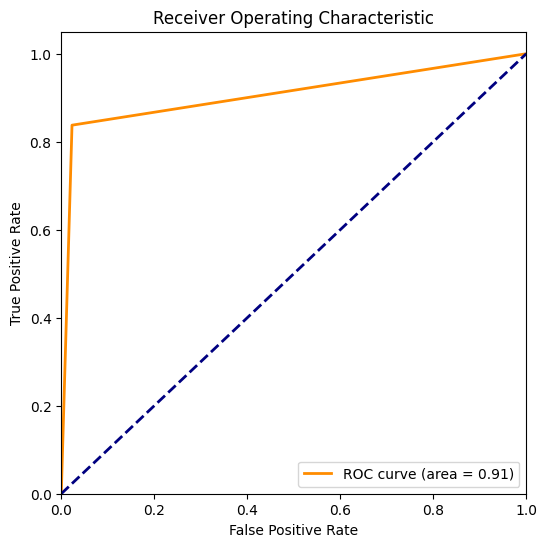

In [39]:
# Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.8376068376068376
Specificity (True Negative Rate): 0.9769230769230769
